In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Make numpy printouts easier to read.
#np.set_printoptions(precision=3, suppress=True)
print(tf.__version__)

2.5.0


In [2]:
f = open('/Users/edgarduarte/ProjectsImac/wbadmin2/syscal.txt')
sys_cal1 = eval(f.read())
syscal_data = pd.DataFrame(sys_cal1[0][0]['data'])
syscal_data = syscal_data.drop(columns=['gainFactor', 'phase'])

/Users/edgarduarte/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


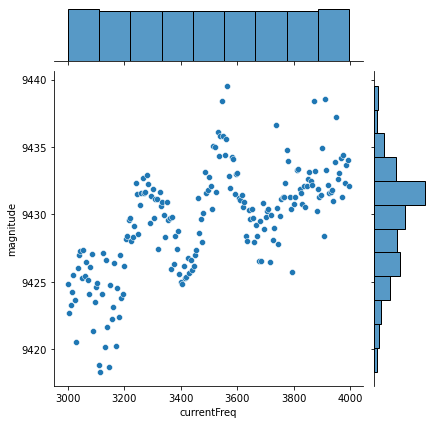

In [3]:
sns.jointplot(syscal_data.currentFreq, syscal_data.magnitude)

In [4]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(syscal_data))
print(normalizer.mean.numpy())
first = np.array(syscal_data[:1])


print('First example:', first)
print()
print('Normalized:', normalizer(first).numpy())

[ 3497.4998 -9390.969    844.655   9429.508 ]
First example: [[ 3000.    -9402.      656.     9424.857]]

Normalized: [[-1.7234105 -1.4101309 -1.7347089 -1.1816084]]


In [5]:
frequency = np.array(syscal_data['currentFreq'])
frequency_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
frequency_normalizer.adapt(frequency)
train_labels = syscal_data.pop('magnitude')
print(frequency_normalizer(frequency).numpy())

[[-1.7234105 ]
 [-1.7060897 ]
 [-1.688769  ]
 [-1.6714483 ]
 [-1.6541276 ]
 [-1.6368068 ]
 [-1.6194861 ]
 [-1.6021655 ]
 [-1.5848447 ]
 [-1.567524  ]
 [-1.5502033 ]
 [-1.5328826 ]
 [-1.5155618 ]
 [-1.4982412 ]
 [-1.4809204 ]
 [-1.4635997 ]
 [-1.4462789 ]
 [-1.4289583 ]
 [-1.4116375 ]
 [-1.3943168 ]
 [-1.3769962 ]
 [-1.3596754 ]
 [-1.3423547 ]
 [-1.325034  ]
 [-1.3077133 ]
 [-1.2903925 ]
 [-1.2730718 ]
 [-1.2557511 ]
 [-1.2384304 ]
 [-1.2211096 ]
 [-1.203789  ]
 [-1.1864682 ]
 [-1.1691475 ]
 [-1.1518269 ]
 [-1.1345061 ]
 [-1.1171854 ]
 [-1.0998646 ]
 [-1.082544  ]
 [-1.0652232 ]
 [-1.0479025 ]
 [-1.0305818 ]
 [-1.0132611 ]
 [-0.9959403 ]
 [-0.97861964]
 [-0.96129894]
 [-0.9439782 ]
 [-0.9266575 ]
 [-0.90933675]
 [-0.89201605]
 [-0.87469536]
 [-0.8573746 ]
 [-0.8400539 ]
 [-0.82273316]
 [-0.8054125 ]
 [-0.7880918 ]
 [-0.770771  ]
 [-0.75345033]
 [-0.7361296 ]
 [-0.7188089 ]
 [-0.7014882 ]
 [-0.68416744]
 [-0.66684675]
 [-0.649526  ]
 [-0.6322053 ]
 [-0.6148846 ]
 [-0.59756386]
 [-0.58024

In [6]:
frequency_model = tf.keras.Sequential([
    frequency_normalizer,
    layers.Dense(units=1)
])
frequency_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [7]:
frequency_model.predict(frequency[:10])

array([[-2.440701 ],
       [-2.4161713],
       [-2.3916416],
       [-2.367112 ],
       [-2.3425822],
       [-2.3180525],
       [-2.2935228],
       [-2.2689934],
       [-2.2444637],
       [-2.2199337]], dtype=float32)

In [8]:
frequency_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [20]:
%%time
history = frequency_model.fit(
    syscal_data['currentFreq'], train_labels,
    epochs=100,
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 1.27 s, sys: 68.1 ms, total: 1.34 s
Wall time: 1.19 s


In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,8703.556641,9594.833984,95
96,8702.893555,9594.979492,96
97,8702.231445,9595.128906,97
98,8701.576172,9595.293945,98
99,8700.911133,9595.449219,99


In [22]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([8000, 10000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [magnitude]')
  plt.legend()
  plt.grid(True)

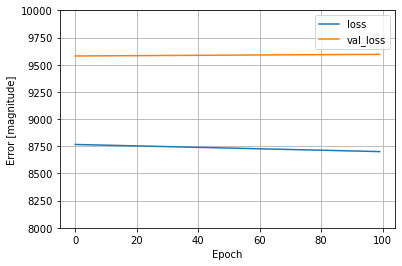

In [23]:
plot_loss(history)

In [13]:
x = tf.linspace(3000, 4000, 1000)
y = frequency_model.predict(x)

In [14]:
def plot_magnitude(x, y):
  plt.scatter(syscal_data['currentFreq'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('frequency')
  plt.ylabel('magnitude')
  plt.legend()

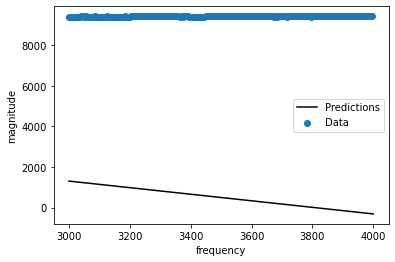

In [15]:
plot_magnitude(x,y)